# Task- Spam sms detection

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [3]:
data=pd.read_csv('spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# drop unnecessary columns

In [6]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
data["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

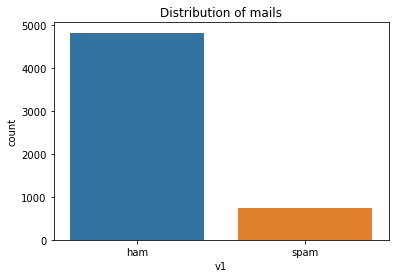

In [13]:
# EDA
sns.countplot(data=data, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [14]:
# Convert the "Category" column values to numerical representation(0 for "spam",1 for "ham")

data.loc[data["v1"] == "spam", "Category"] = 0
data.loc[data["v1"] == "ham", "Category"] = 1

data.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [16]:
X = data['v2']
Y = data['Category']

# Splitting the data into train and test data

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [18]:
# TF-IDF vectorizer to convert text messages to numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

In [ ]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# model building

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_features, Y_train)

MultinomialNB()

In [ ]:
# prediction and accuracy

In [21]:
pred=model.predict(X_test_features)
acc=accuracy_score(Y_test,pred)
print('Accuracy: ',acc.round(4)*100,'%')

Accuracy:  95.99 %


# Confusion Matrix 

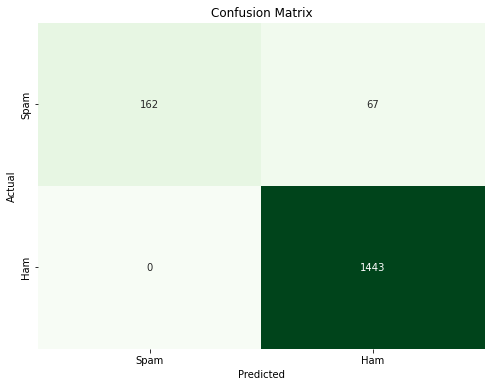

In [22]:
conf_matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Classification report
classification_rep = classification_report(Y_test, pred,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       1.00      0.71      0.83       229
         Ham       0.96      1.00      0.98      1443

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



# predictions on new data

In [33]:
input ="As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
input_data = feature_extraction.transform([input])
prediction = model.predict(input_data)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail
